# STOCK PRICE PREDICTION USING LSTM (GOOGLE STOCKS)


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading Dataset

In [2]:
google_stock_data = pd.read_csv('GOOG.csv.xls')
google_stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
google_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [4]:
google_stock_data = google_stock_data[['date','open','close']] # Extracting required columns
google_stock_data['date'] = pd.to_datetime(google_stock_data['date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock_data.set_index('date',drop=True,inplace=True) # Setting date column as index
google_stock_data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


# Transforming Data

In [5]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

In [6]:
google_stock_data.shape

(1258, 2)

In [7]:
training_size = round(len(google_stock_data) * 0.80) 
training_size

1006

In [8]:
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

# Creating Sequence

In [9]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [10]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [11]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

# Importing Keras models and Layers

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Fitting 

In [14]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
30/30 [==============================] - 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0662 - val_loss: 0.0218 - val_mean_absolute_error: 0.1268
Epoch 2/80
30/30 [==============================] - 0s 16ms/step - loss: 8.9183e-04 - mean_absolute_error: 0.0227 - val_loss: 0.0071 - val_mean_absolute_error: 0.0683
Epoch 3/80
30/30 [==============================] - 0s 16ms/step - loss: 6.0082e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0042 - val_mean_absolute_error: 0.0512
Epoch 4/80
30/30 [==============================] - 1s 17ms/step - loss: 5.5709e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0061 - val_mean_absolute_error: 0.0641
Epoch 5/80
30/30 [==============================] - 1s 18ms/step - loss: 5.4873e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0056 - val_mean_absolute_error: 0.0618
Epoch 6/80
30/30 [==============================] - 1s 17ms/step - loss: 5.1800e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0045 - val_mean_absolute_error: 0.0535
Ep

Epoch 50/80
30/30 [==============================] - 1s 17ms/step - loss: 2.2408e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0020 - val_mean_absolute_error: 0.0348
Epoch 51/80
30/30 [==============================] - 1s 17ms/step - loss: 2.3328e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0026 - val_mean_absolute_error: 0.0402
Epoch 52/80
30/30 [==============================] - 1s 17ms/step - loss: 2.2099e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0040 - val_mean_absolute_error: 0.0527
Epoch 53/80
30/30 [==============================] - 1s 18ms/step - loss: 1.9939e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0016 - val_mean_absolute_error: 0.0314
Epoch 54/80
30/30 [==============================] - 1s 17ms/step - loss: 2.4664e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0072 - val_mean_absolute_error: 0.0737
Epoch 55/80
30/30 [==============================] - 1s 17ms/step - loss: 1.9790e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0039 - val_mean_absolute_error:

# Model Prediction

In [15]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 0s 4ms/step


array([[0.48695233, 0.48533198],
       [0.4936651 , 0.491673  ],
       [0.49898595, 0.49649718],
       [0.5126244 , 0.509347  ],
       [0.52365106, 0.51986045]], dtype=float32)

In [16]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) 
test_inverse_predicted[:5]

array([[1573.7706, 1567.7451],
       [1586.2156, 1579.4973],
       [1596.0801, 1588.4381],
       [1621.3646, 1612.2533],
       [1641.8071, 1631.7382]], dtype=float32)

In [17]:
gs_slic_data = pd.concat([google_stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=google_stock_data.iloc[-202:].index)], axis=1)

In [18]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['open','close']])

In [19]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1573.770630,1567.745117
2020-08-25,1582.07,1608.22,1586.215576,1579.497314
2020-08-26,1608.00,1652.38,1596.080078,1588.438110
2020-08-27,1653.68,1634.33,1621.364624,1612.253296
2020-08-28,1633.49,1644.41,1641.807129,1631.738159


# Plotting Actual Vs Predicted Price

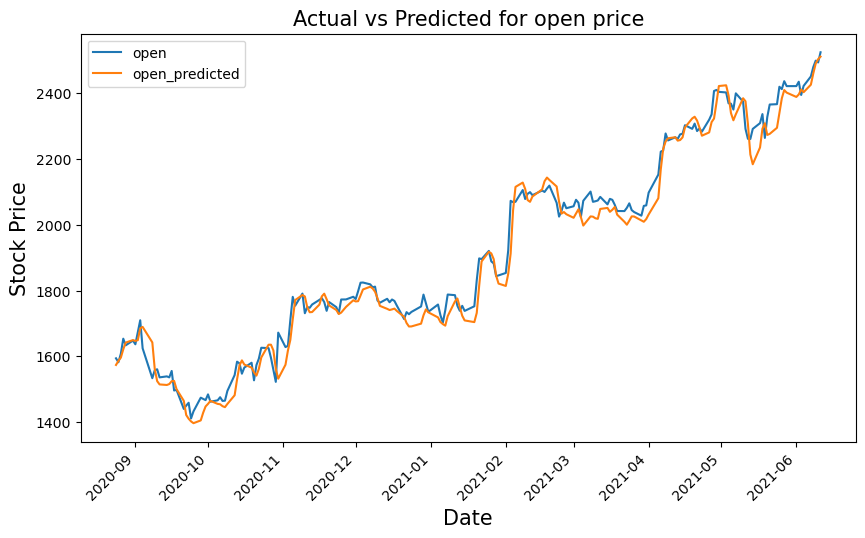

In [20]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

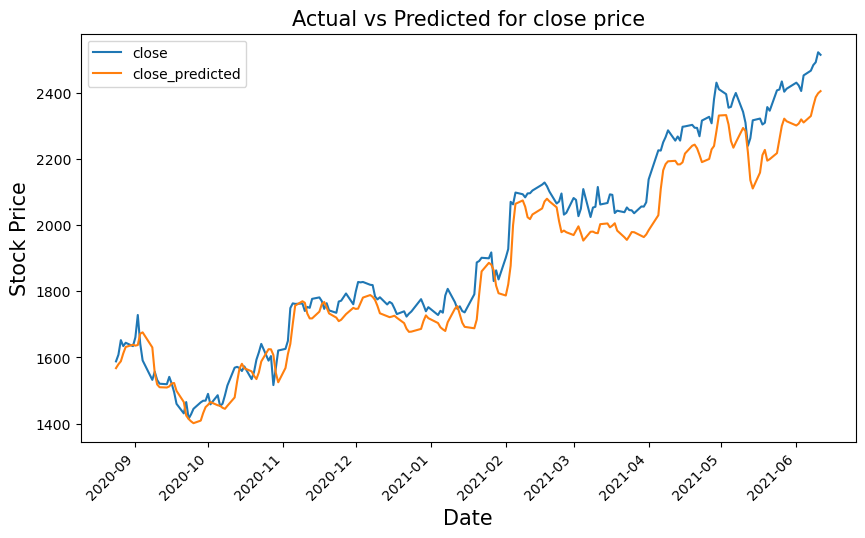

In [21]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [26]:
gs_slic_data = gs_slic_data._append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', inclusive='right')))

In [27]:
gs_slic_data['2021-06-09	':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2490.524414,2385.919678
2021-06-10,2494.01,2521.60,2503.966553,2397.806152
2021-06-11,2524.92,2513.93,2511.616211,2404.291016
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [28]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [29]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 10ms/step


# Upcoming Predicition

In [30]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

/var/folders/m4/ztm1pyb13434snk9fqhdthjc0000gn/T/ipykernel_23667/4155468105.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


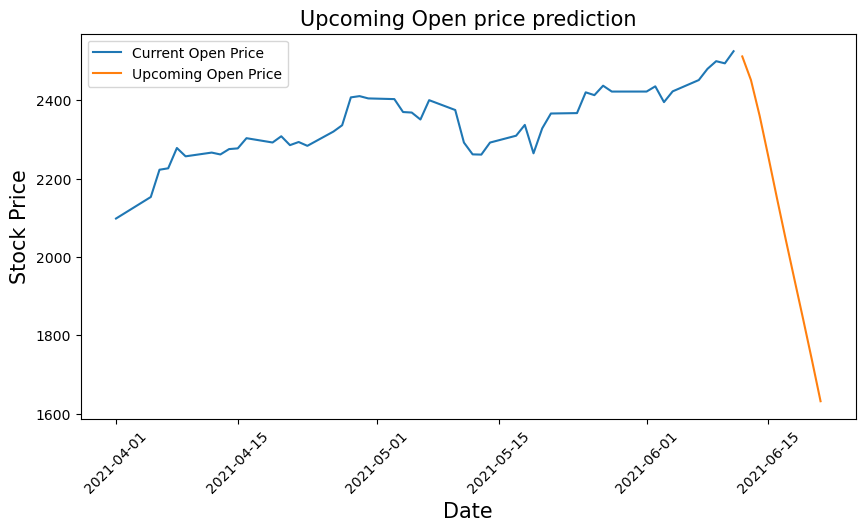

In [31]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

/var/folders/m4/ztm1pyb13434snk9fqhdthjc0000gn/T/ipykernel_23667/548185773.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


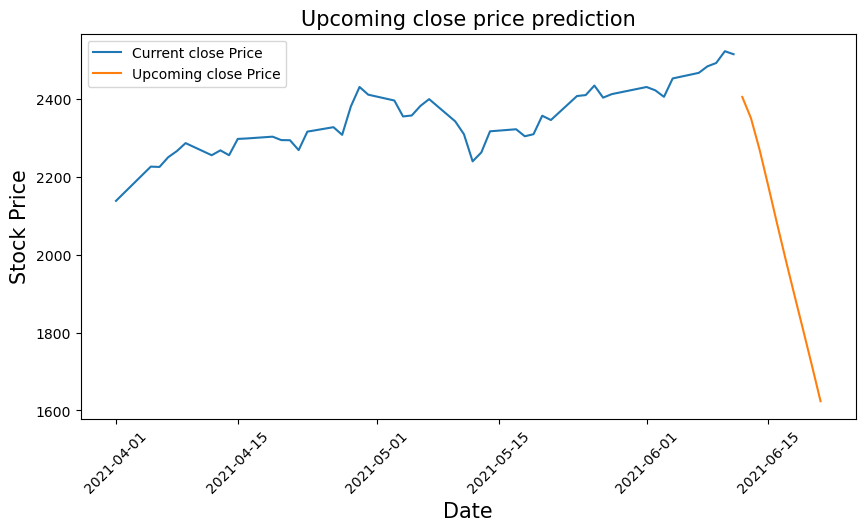

In [32]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()